In [1]:
# Import
import json
import pandas as pd

In [2]:
# Open data
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

print(df.head())



         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [3]:
df.columns

Index(['id', 'name', 'shortTitle', 'text', 'teaser', 'shortTeaser', 'kicker',
       'regions', 'keywords', 'keywordStrings', 'thematicFocusCategory',
       'navigations', 'categories', 'departments', 'firstPublicationDate',
       'lastModifiedDate', 'contentDate', 'relatedAutoTopics', 'contentLinks',
       'articles', 'isOpinion', 'geographicLocations', 'contentAssociations',
       'mainContentImageLink', 'images', 'externalLinks', 'topStory',
       'language'],
      dtype='object')

In [4]:
df['keywordStrings'].head()

0    [DRC, M23, FDLR, Rwanda, Susan Rice, UN securi...
1    [telephone, hotline, helpline, Catholic Church...
2    [fiscal cliff, Obama, congress, spending cuts,...
3    [Kim Jong Un, Kim Jong Il, Kim Il Sung, lee my...
4    [fiscal cliff, US Senate, Senate vote, fiscal ...
Name: keywordStrings, dtype: object

In [5]:
#df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)
#df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
#df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
#df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

#df = df[['firstKeyword', 'secondKeyword', 'thirdKeyword', 'fourthKeyword', 'thematicFocusCategory', 'cleanFocusCategory']]

df = df[['keywordStrings', 'cleanFocusCategory']]

In [6]:
#df.describe()

In [7]:
df_clean = df.copy()
df_clean = df_clean.dropna()
#df_clean.describe()

In [27]:
df_clean['cleanKeywordStrings'] = [' '.join(map(str, l)) for l in df_clean['keywordStrings']]
print(df_clean['cleanKeywordStrings'].head())

8762     Africalink Top Story Africa on the Move Making...
31542    Commerzbank job cuts administration retail ban...
31543            Moody's Turkey ratings agency junk status
31544                 Syria Aleppo war crimes water UNICEF
31545                              Conflict Zone Talk link
Name: cleanKeywordStrings, dtype: object


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
labels = df_clean['cleanFocusCategory']
features.shape

(79913, 23420)

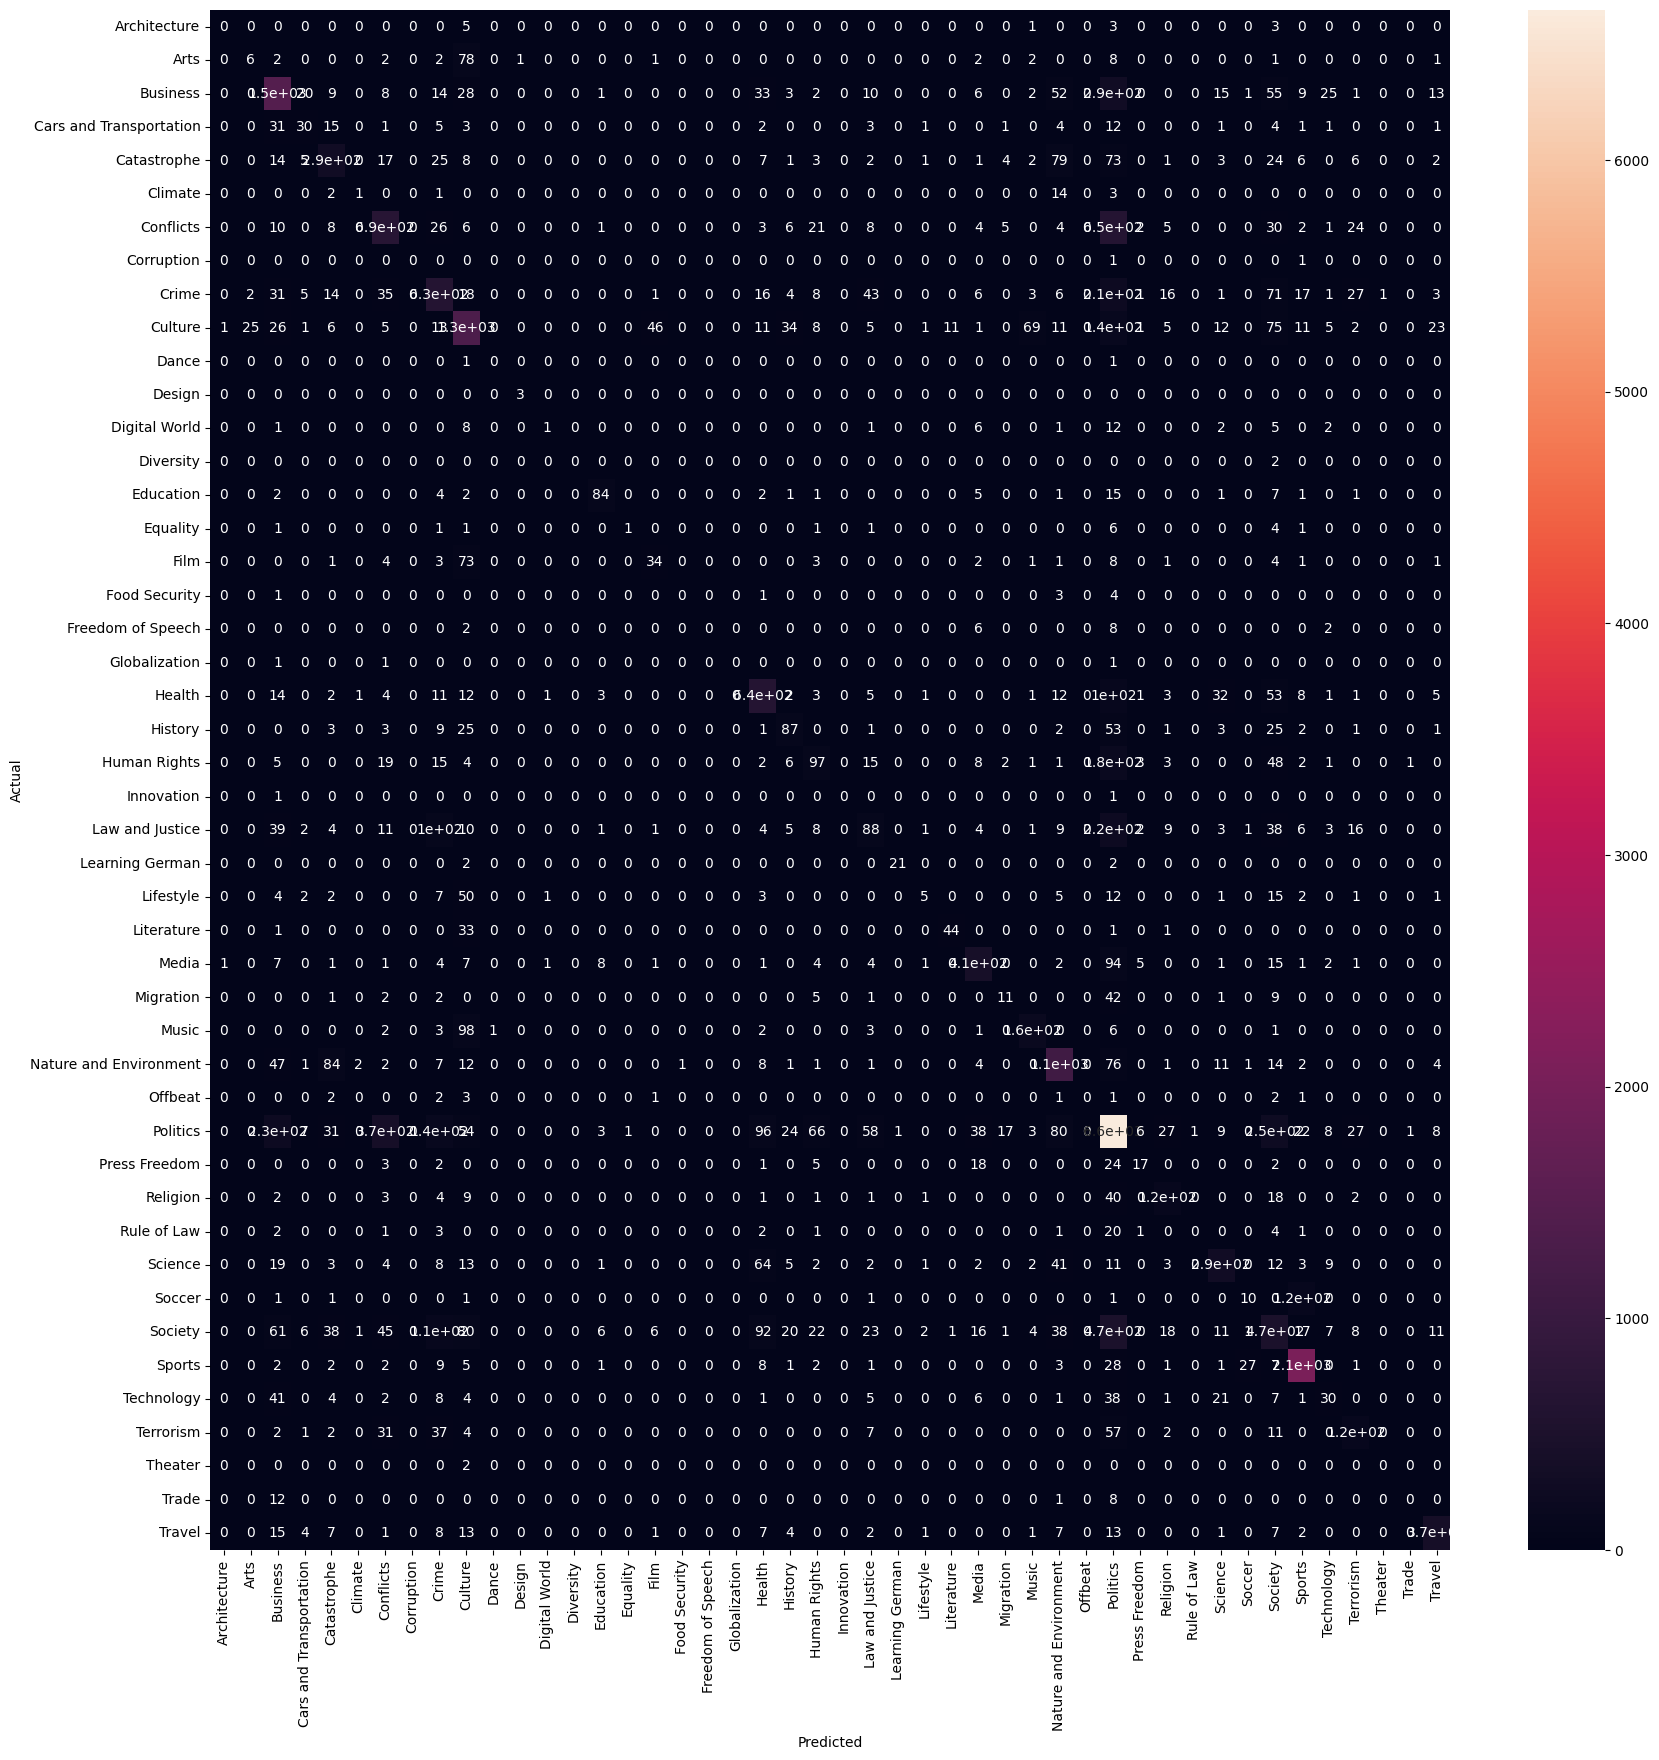

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6602077961474291

In [34]:

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
labels = df_clean['cleanFocusCategory']
features.shape

(79913, 30175)

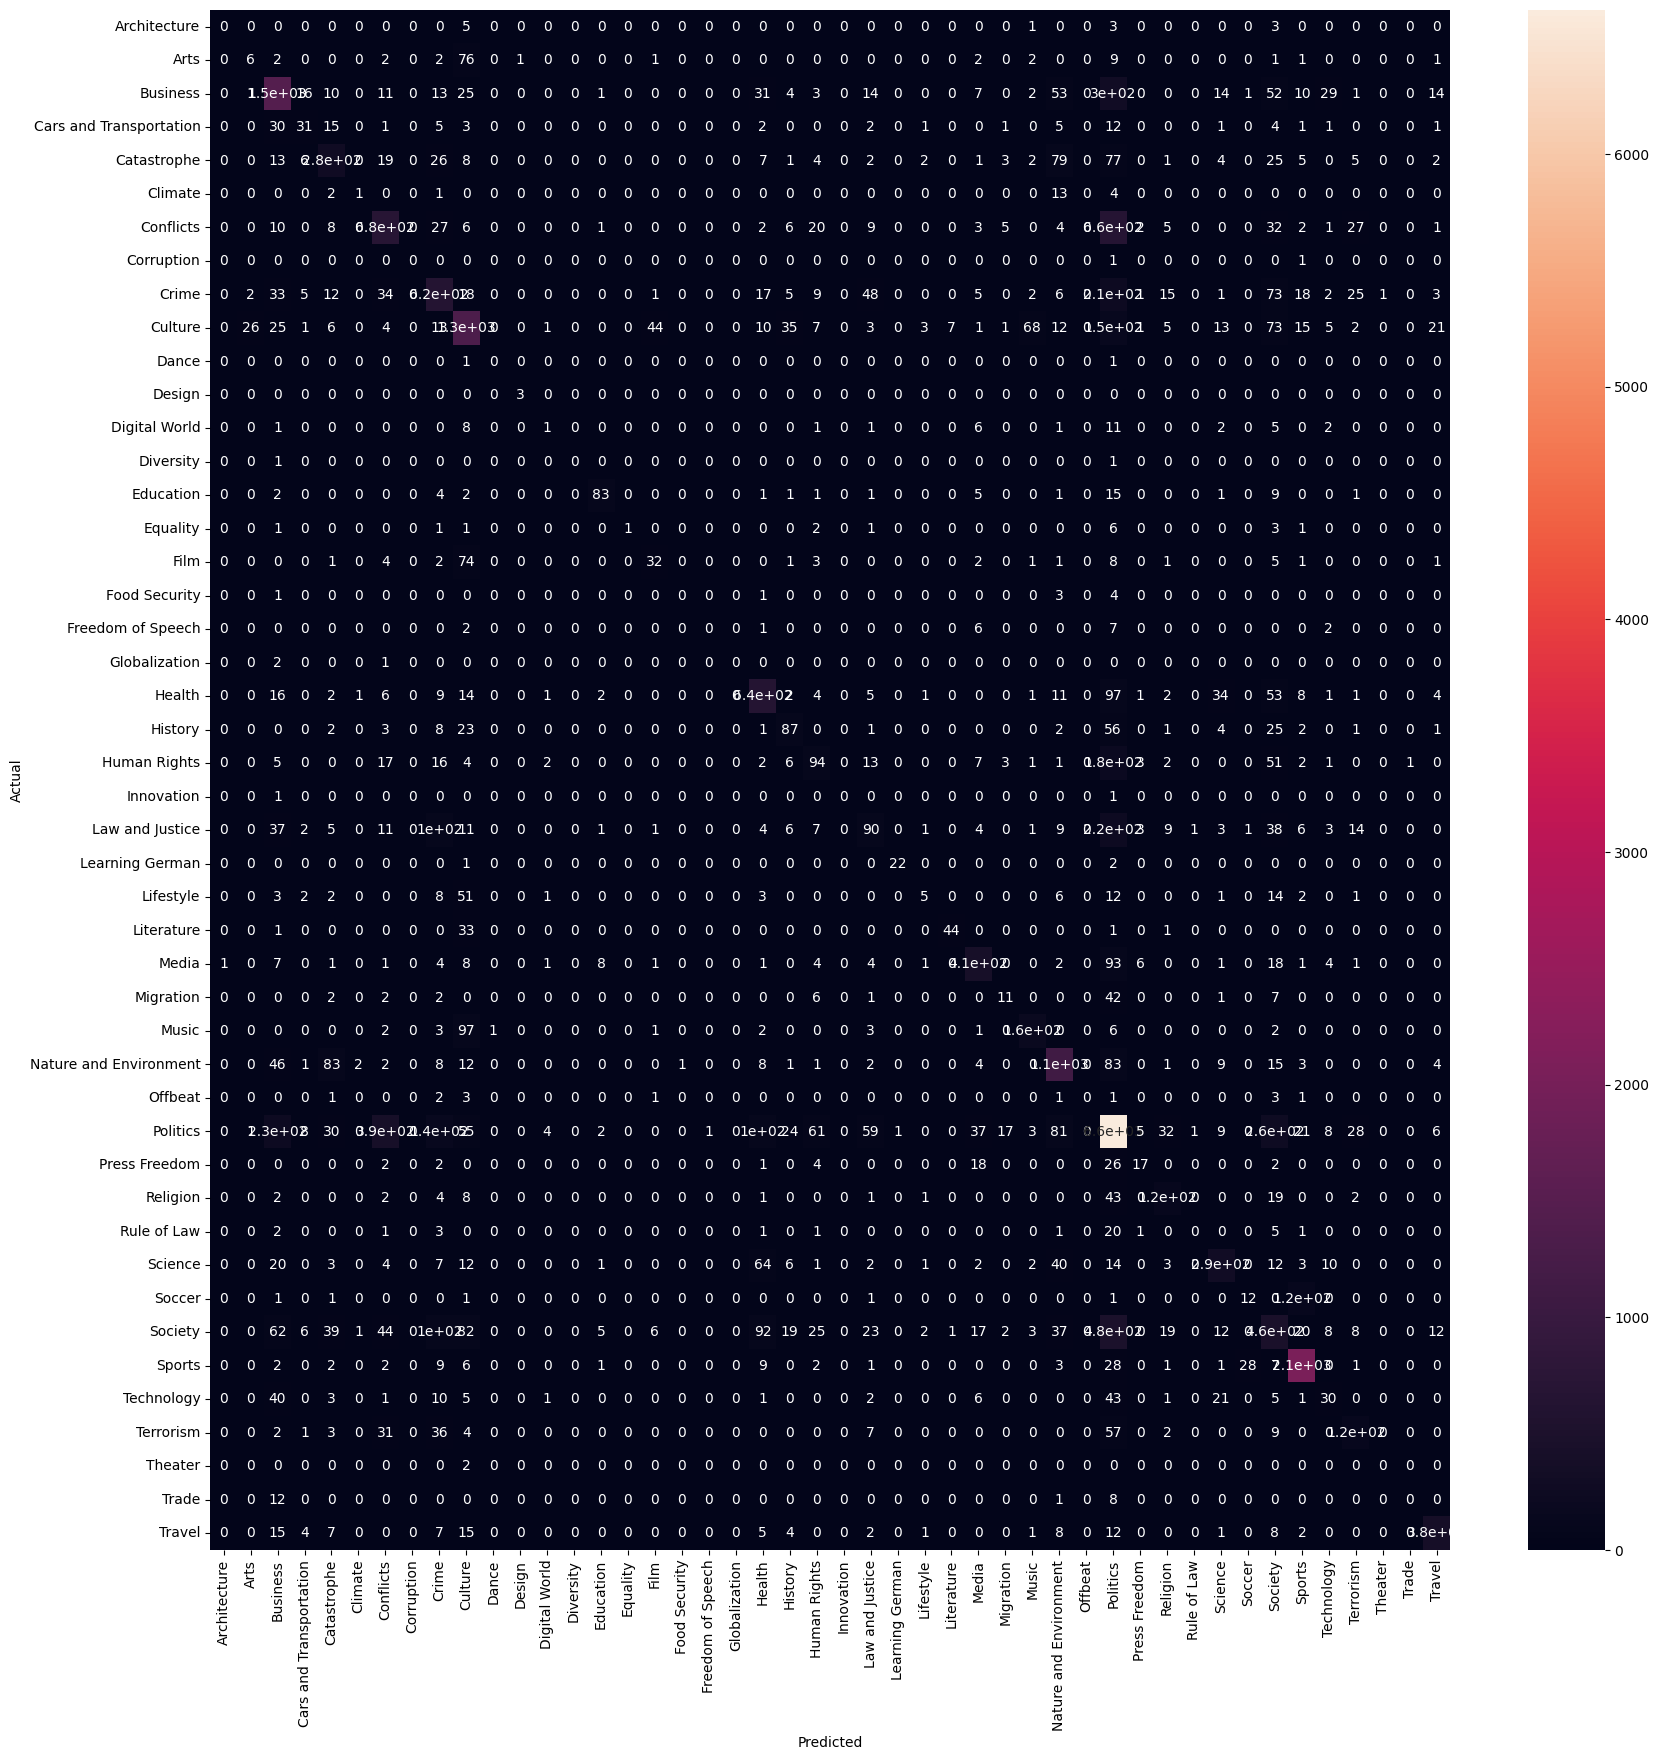

In [35]:

category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
accuracy_score(y_test,y_pred)

0.65664340967693

In [224]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 4), stop_words='english')
features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
labels = df_clean['cleanFocusCategory']
features.shape

(79913, 32705)

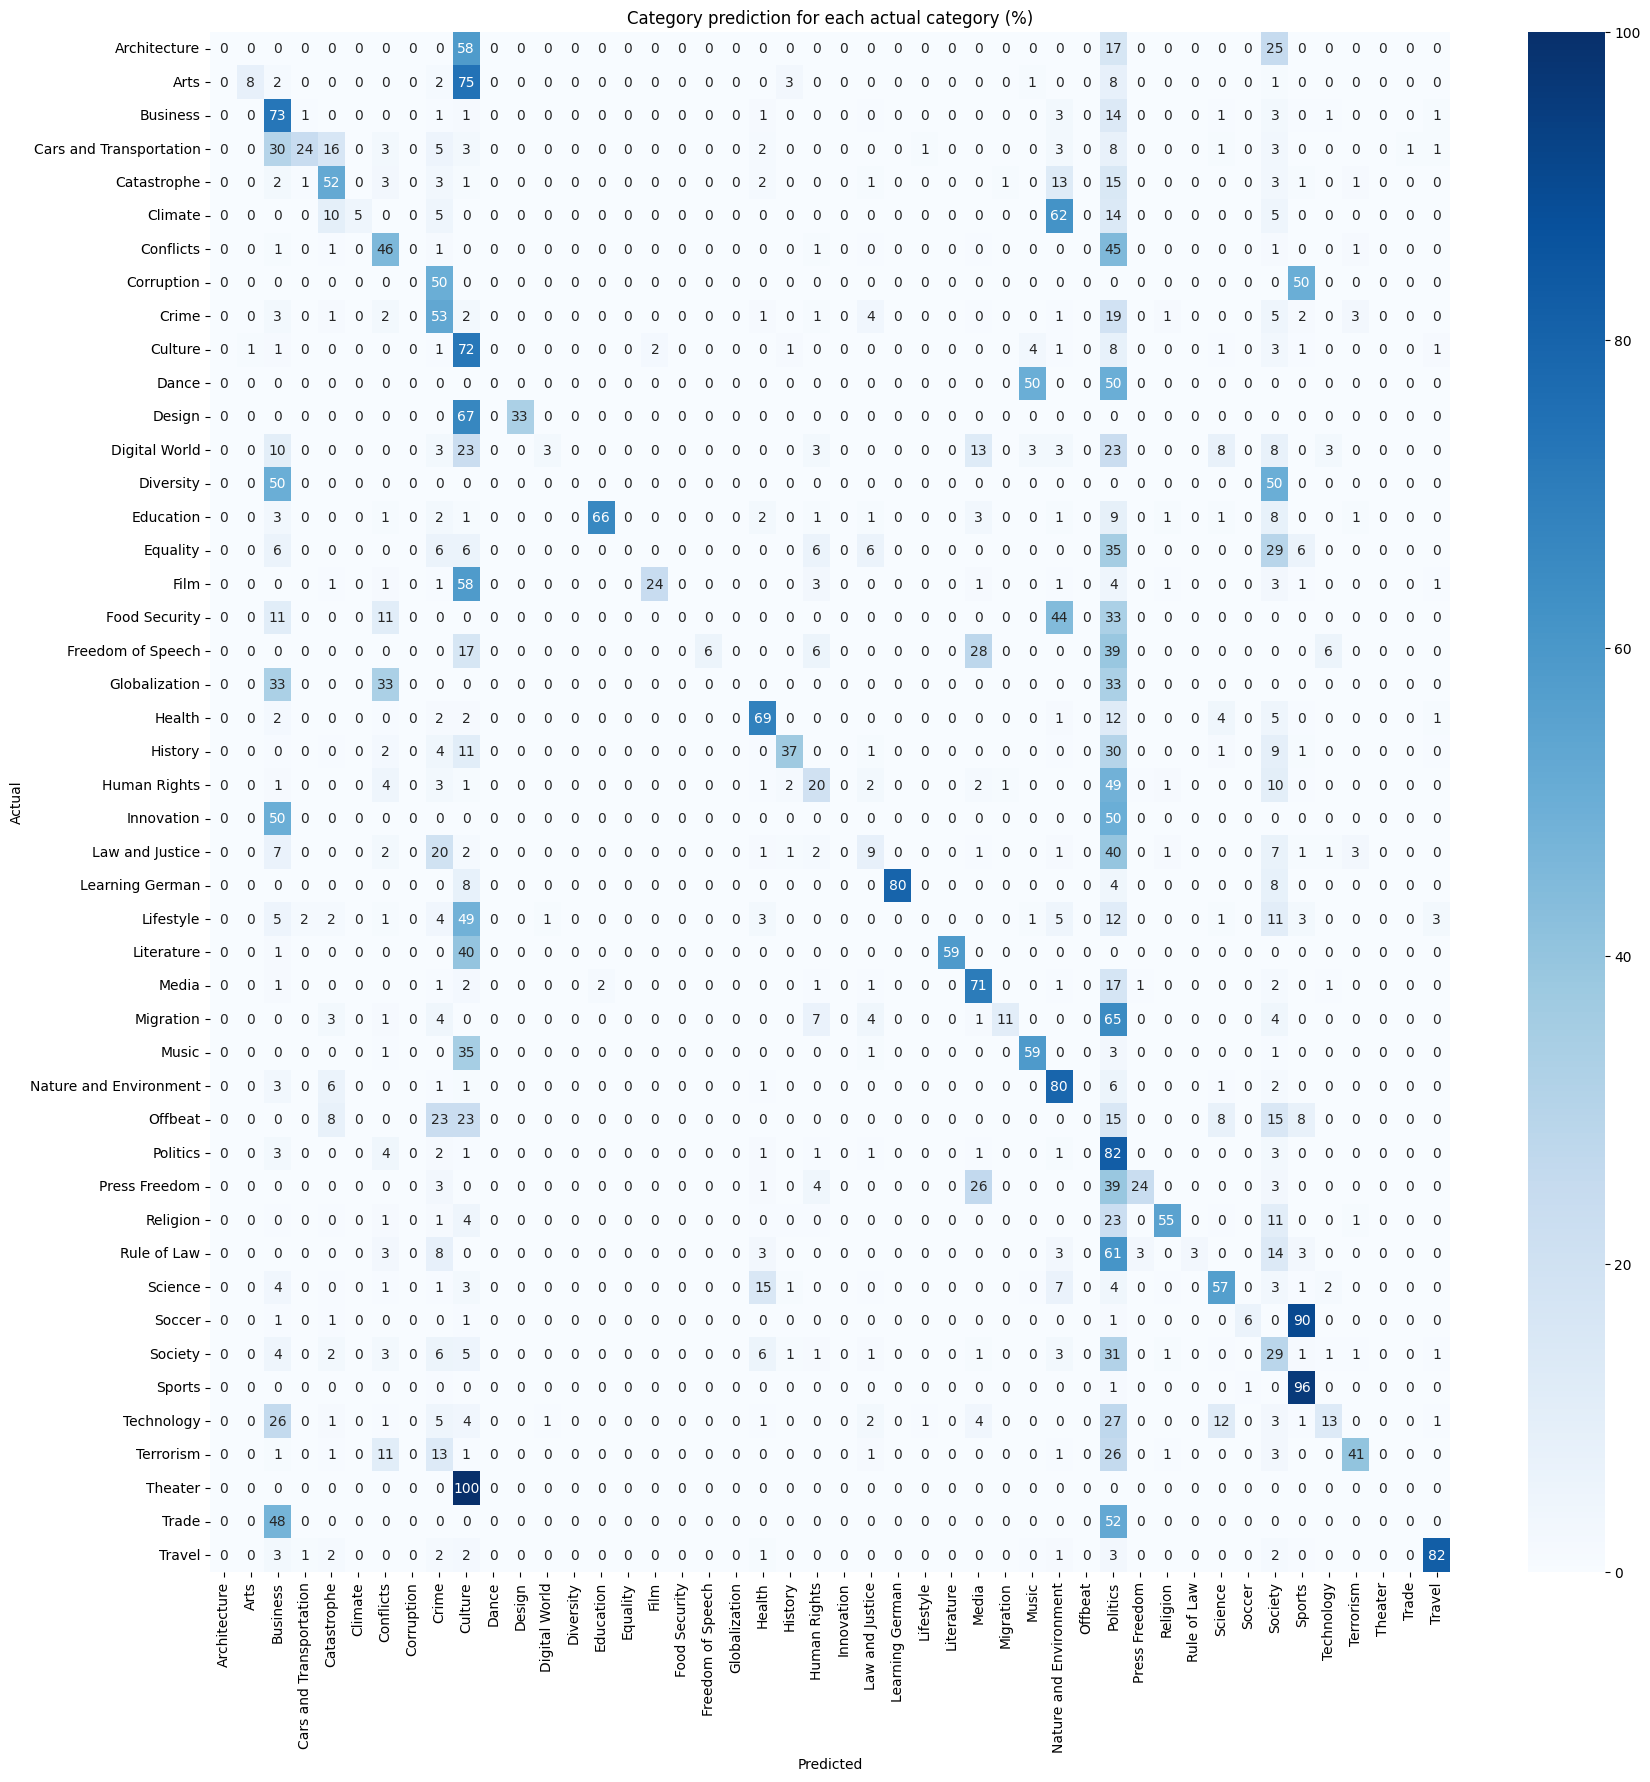

In [617]:

category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(100*conf_mat/conf_mat.sum(axis=1)[:,None], annot=True, fmt='.0f', cmap='Blues', xticklabels=category_id_df.values, yticklabels=category_id_df.values)
#sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Category prediction for each actual category (%)')
plt.show()

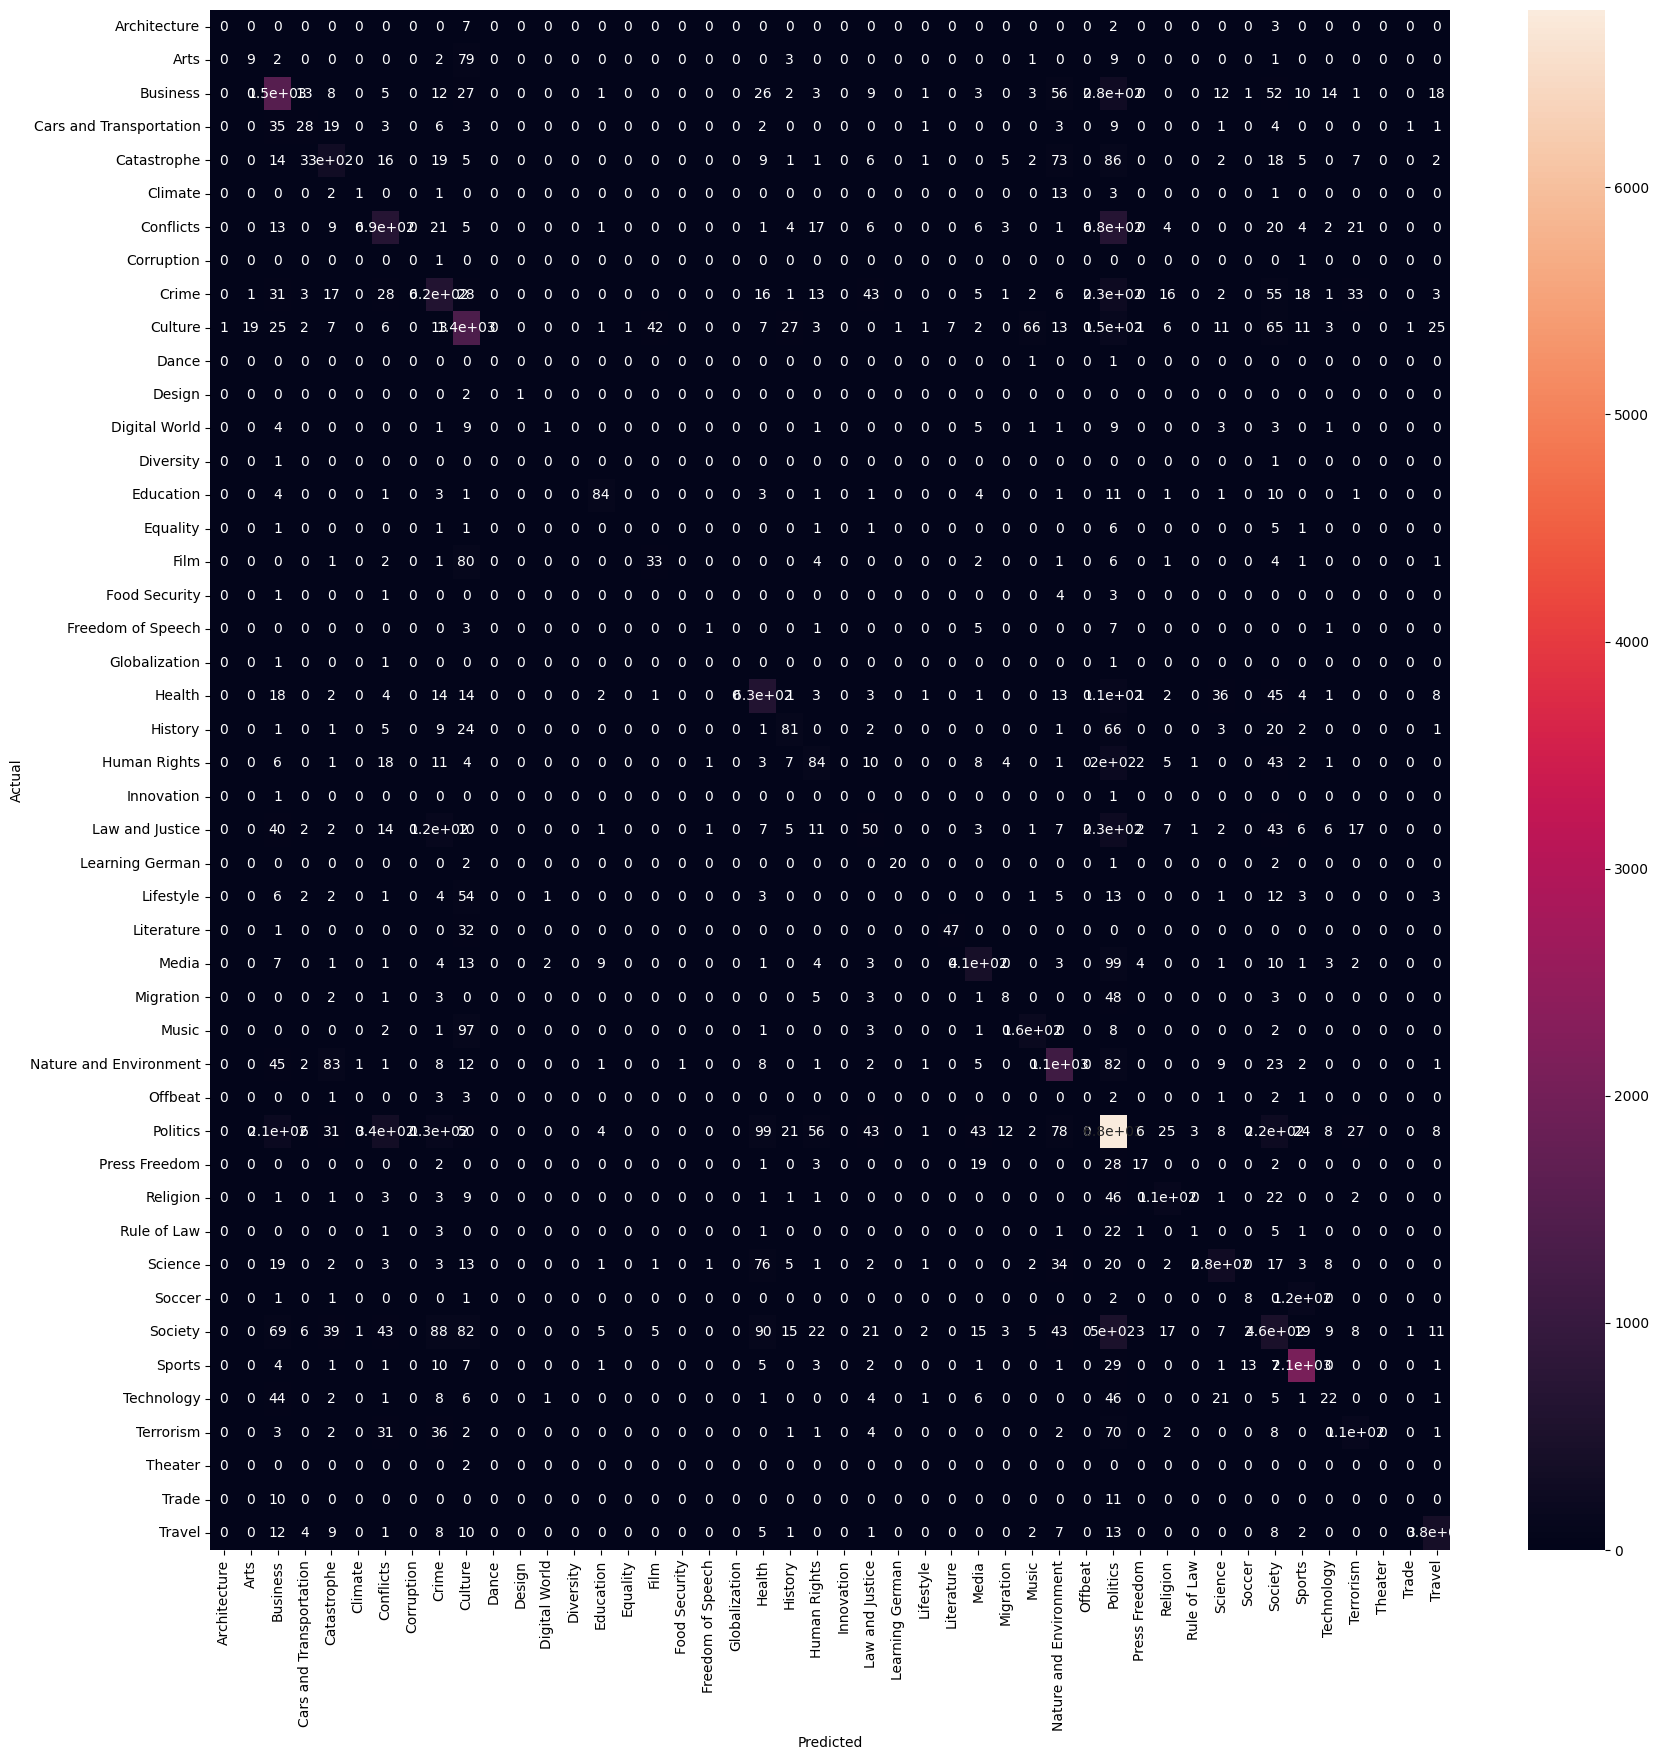

In [618]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [621]:
accuracy_score(y_test,y_pred)

0.6636205065979068

In [634]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 10), stop_words='english')
features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
labels = df_clean['cleanFocusCategory']
features.shape

(79913, 142969)

In [635]:
category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
#from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)
#fig, ax = plt.subplots(figsize=(20,20))
#sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

0.6556954345517974


In [653]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf__alpha': (0.00001, 0.000001),
    #'clf__penalty': ('l2', 'elasticnet'),
    #'clf__n_iter': (10, 50, 80),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/pipeline.py", line 

AttributeError: lower not found

In [655]:
df_clean.columns

Index(['keywordStrings', 'cleanFocusCategory', 'cleanKeywordStrings'], dtype='object')

In [676]:
df_clean = df_clean.drop('keywordStrings', axis=1)


KeyError: "['keywordStrings'] not found in axis"

In [692]:
train_df, test_df = train_test_split(df_clean, test_size=0.33, random_state=0, stratify=df_clean['cleanFocusCategory'])
train_data = train_df['cleanKeywordStrings']
train_target = train_df['cleanFocusCategory']
test_data = test_df['cleanKeywordStrings']
test_target = test_df['cleanFocusCategory']


In [693]:
pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("classifier", LinearSVC()),  # final estimator is a classifier
    ]
)

In [696]:
svm_param_grid = {
    "tfidf__min_df": [1,2,5,10,20],
    "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)]
    #"tfidf__smooth_idf": [True, False]
}

In [697]:
from sklearn.model_selection import RandomizedSearchCV
print("Fitting started...")
search = RandomizedSearchCV(pipeline, param_distributions=svm_param_grid, verbose=8)
search.fit(train_data, train_target)

Fitting started...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


[CV 1/5] END tfidf__min_df=2, tfidf__ngram_range=(1, 3);, score=0.652 total time=  13.4s
[CV 2/5] END tfidf__min_df=2, tfidf__ngram_range=(1, 3);, score=0.652 total time=  12.6s
[CV 3/5] END tfidf__min_df=2, tfidf__ngram_range=(1, 3);, score=0.654 total time=  12.7s
[CV 4/5] END tfidf__min_df=2, tfidf__ngram_range=(1, 3);, score=0.650 total time=  12.3s
[CV 5/5] END tfidf__min_df=2, tfidf__ngram_range=(1, 3);, score=0.656 total time=  12.6s
[CV 1/5] END tfidf__min_df=10, tfidf__ngram_range=(1, 3);, score=0.653 total time=   9.0s
[CV 2/5] END tfidf__min_df=10, tfidf__ngram_range=(1, 3);, score=0.652 total time=   9.0s
[CV 3/5] END tfidf__min_df=10, tfidf__ngram_range=(1, 3);, score=0.654 total time=  10.0s
[CV 4/5] END tfidf__min_df=10, tfidf__ngram_range=(1, 3);, score=0.647 total time=   8.9s
[CV 5/5] END tfidf__min_df=10, tfidf__ngram_range=(1, 3);, score=0.656 total time=   8.7s
[CV 1/5] END tfidf__min_df=1, tfidf__ngram_range=(1, 7);, score=0.665 total time=  49.0s
[CV 2/5] END tfi

RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('classifier', LinearSVC())]),
                   param_distributions={'tfidf__min_df': [1, 2, 5, 10, 20],
                                        'tfidf__ngram_range': [(1, 1), (1, 2),
                                                               (1, 3), (1, 4),
                                                               (1, 5), (1, 6),
                                                               (1, 7)]},
                   verbose=8)

In [709]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tfidf__ngram_range,param_tfidf__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.134540,0.374049,0.585860,0.012883,"(1, 3)",2,"{'tfidf__ngram_range': (1, 3), 'tfidf__min_df'...",0.651882,0.651756,0.653623,0.650075,0.656238,0.652715,0.002089,4
1,8.590402,0.444065,0.544437,0.009210,"(1, 3)",10,"{'tfidf__ngram_range': (1, 3), 'tfidf__min_df'...",0.652535,0.651662,0.653810,0.646526,0.656145,0.652136,0.003185,7
2,45.804001,1.667545,0.945836,0.039633,"(1, 7)",1,"{'tfidf__ngram_range': (1, 7), 'tfidf__min_df'...",0.664861,0.661281,0.667538,0.663242,0.666324,0.664650,0.002214,3
3,4.707730,0.070785,0.259353,0.006015,"(1, 1)",20,"{'tfidf__ngram_range': (1, 1), 'tfidf__min_df'...",0.649640,0.652129,0.650822,0.650448,0.652783,0.651165,0.001140,8
4,21.989583,0.274997,0.610280,0.045596,"(1, 3)",1,"{'tfidf__ngram_range': (1, 3), 'tfidf__min_df'...",0.667756,0.663242,0.666511,0.662589,0.667258,0.665471,0.002134,1
5,8.864799,0.584871,0.632389,0.037331,"(1, 4)",20,"{'tfidf__ngram_range': (1, 4), 'tfidf__min_df'...",0.644972,0.652036,0.652970,0.645312,0.653157,0.649689,0.003734,9
6,13.308737,0.730824,0.932561,0.117797,"(1, 7)",2,"{'tfidf__ngram_range': (1, 7), 'tfidf__min_df'...",0.651975,0.651662,0.653063,0.649608,0.654371,0.652136,0.001581,6
7,7.541793,0.535209,0.470044,0.045216,"(1, 2)",5,"{'tfidf__ngram_range': (1, 2), 'tfidf__min_df'...",0.648613,0.651476,0.654184,0.649421,0.658480,0.652435,0.003583,5
8,38.678517,1.242268,0.834831,0.007025,"(1, 6)",1,"{'tfidf__ngram_range': (1, 6), 'tfidf__min_df'...",0.665515,0.660908,0.667445,0.663429,0.666885,0.664836,0.002403,2
9,9.275153,0.198875,0.855200,0.125509,"(1, 7)",20,"{'tfidf__ngram_range': (1, 7), 'tfidf__min_df'...",0.644972,0.651942,0.652876,0.645219,0.653063,0.649614,0.003710,10


Text(0.5, 1.0, 'In sample accuracy of Linear SVC according to TF-IDF hyperparameters')

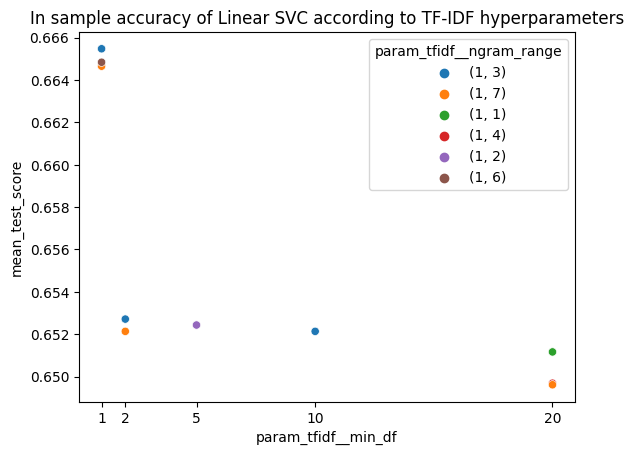

In [731]:
ax = sns.scatterplot(data=pd.DataFrame(search.cv_results_), y='mean_test_score',x ='param_tfidf__min_df', hue='param_tfidf__ngram_range')
ax.set_xticks([1,2,5,10,20])
plt.title('In sample accuracy of Linear SVC according to TF-IDF hyperparameters')

In [ ]:
from sklearn.metrics import classification_report
y_pred = search.predict(test_data)
cr = classification_report(test_target, y_pred)
print(cr)

In [738]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
labels = df_clean['cleanFocusCategory']
features.shape

#train_df, test_df = train_test_split(df_clean, test_size=0.33, random_state=0, stratify=df_clean['cleanFocusCategory'])
#train_data = train_df['cleanKeywordStrings']
#train_target = train_df['cleanFocusCategory']
#test_data = test_df['cleanKeywordStrings']
#test_target = test_df['cleanFocusCategory']

train_data, test_data, train_target, test_target, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
#model.fit(train_data, train_target)
#y_pred = model.predict(X_test)
#print(accuracy_score(y_test,y_pred))



In [739]:
from sklearn.linear_model import SGDClassifier


# Initialize the estimators
clf1 = LinearSVC()
clf2 = SGDClassifier()
#clf3 = KNeighborsClassifier()

# Create the parameter grid
param1 = {}
#param1['classifier__C'] = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5]
#param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
#param1['classifier'] = [clf1]

param1['classifier__C'] = [1.0, 10.0, 100.0, 1000.0]
param1['classifier'] = [clf1]
#param2 = {}
#param2['classifier__max_depth'] = [1,5,10,25,None]
#param2['classifier__min_samples_split'] = [2,5,10]
#param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
#param2['classifier'] = [clf2]

param2 = {}
param2['classifier__alpha'] = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3] # learning rate
#param2['classifier__n_iter']= [1,10,20] # number of epochs
param2['classifier__loss']= ['log'] # logistic regression,
param2['classifier__penalty']= ['l2']
param2['classifier'] = [clf2]


#param3 = {}
#param3['classifier__n_neighbors'] = [2,5,10,15,25,40,90,100,110,120,130]
#param3['classifier'] = [clf3]

# Setup the pipeline
pipel = Pipeline(steps=[('classifier', clf1)])
params = [param1, param2]

#gs = RandomizedSearchCV(pipeline, params, cv=kf, n_jobs=-1, scoring='precision').fit(X_train_scaled, y_train)

gs = RandomizedSearchCV(pipel, params, verbose=8)
gs.fit(train_data, train_target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


[CV 1/5] END classifier=SGDClassifier(), classifier__alpha=0.0001, classifier__loss=log, classifier__penalty=l2;, score=0.497 total time=  15.5s
[CV 2/5] END classifier=SGDClassifier(), classifier__alpha=0.0001, classifier__loss=log, classifier__penalty=l2;, score=0.496 total time=  15.5s
[CV 3/5] END classifier=SGDClassifier(), classifier__alpha=0.0001, classifier__loss=log, classifier__penalty=l2;, score=0.499 total time=  14.9s
[CV 4/5] END classifier=SGDClassifier(), classifier__alpha=0.0001, classifier__loss=log, classifier__penalty=l2;, score=0.499 total time=  14.6s
[CV 5/5] END classifier=SGDClassifier(), classifier__alpha=0.0001, classifier__loss=log, classifier__penalty=l2;, score=0.499 total time=  14.6s
[CV 1/5] END classifier=SGDClassifier(), classifier__alpha=1.0, classifier__loss=log, classifier__penalty=l2;, score=0.312 total time=  15.9s
[CV 2/5] END classifier=SGDClassifier(), classifier__alpha=1.0, classifier__loss=log, classifier__penalty=l2;, score=0.312 total time

/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(), classifier__C=100.0;, score=0.643 total time= 4.6min


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(), classifier__C=100.0;, score=0.638 total time= 5.1min


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(), classifier__C=100.0;, score=0.645 total time= 5.2min


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(), classifier__C=100.0;, score=0.639 total time= 3.7min


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(), classifier__C=100.0;, score=0.643 total time= 3.8min
[CV 1/5] END classifier=SGDClassifier(), classifier__alpha=0.1, classifier__loss=log, classifier__penalty=l2;, score=0.312 total time=  23.4s
[CV 2/5] END classifier=SGDClassifier(), classifier__alpha=0.1, classifier__loss=log, classifier__penalty=l2;, score=0.312 total time=  23.2s
[CV 3/5] END classifier=SGDClassifier(), classifier__alpha=0.1, classifier__loss=log, classifier__penalty=l2;, score=0.312 total time=  23.0s
[CV 4/5] END classifier=SGDClassifier(), classifier__alpha=0.1, classifier__loss=log, classifier__penalty=l2;, score=0.312 total time=  22.9s
[CV 5/5] END classifier=SGDClassifier(), classifier__alpha=0.1, classifier__loss=log, classifier__penalty=l2;, score=0.312 total time=  23.2s
[CV 1/5] END classifier=SGDClassifier(), classifier__alpha=0.001, classifier__loss=log, classifier__penalty=l2;, score=0.329 total time=  11.1s
[CV 2/5] END classifier=SGDClassifier(), classifier__alp

RandomizedSearchCV(estimator=Pipeline(steps=[('classifier', LinearSVC())]),
                   param_distributions=[{'classifier': [LinearSVC()],
                                         'classifier__C': [1.0, 10.0, 100.0,
                                                           1000.0]},
                                        {'classifier': [SGDClassifier()],
                                         'classifier__alpha': [0.0001, 0.001,
                                                               0.01, 0.1, 1.0,
                                                               10.0, 100.0,
                                                               1000.0],
                                         'classifier__loss': ['log'],
                                         'classifier__penalty': ['l2']}],
                   verbose=8)

In [806]:
df_plot = pd.DataFrame(gs.cv_results_).copy()
df_plot['param_classifier__alpha'] = df_plot['param_classifier__alpha'].fillna(df_plot['param_classifier__C'])
#df['feedback_id'].combine_first(df['_id'])

In [807]:
df_plot

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__penalty,param_classifier__loss,param_classifier__alpha,param_classifier,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.643751,0.347023,0.392514,0.239388,l2,log,0.0001,SGDClassifier(),NaN,"{'classifier__penalty': 'l2', 'classifier__los...",0.496778,0.496264,0.498693,0.498973,0.498879,0.497918,0.001155,4
1,15.719616,0.212626,0.246013,0.016739,l2,log,1.0000,SGDClassifier(),NaN,"{'classifier__penalty': 'l2', 'classifier__los...",0.311887,0.311916,0.311823,0.311823,0.311916,0.311873,0.000042,6
2,21.384507,1.050340,0.068380,0.022455,NaN,NaN,1.0000,LinearSVC(),1.0,"{'classifier__C': 1.0, 'classifier': LinearSVC()}",0.660379,0.659507,0.661842,0.657266,0.663523,0.660503,0.002117,1
3,24.680447,0.725076,0.226416,0.008404,l2,log,0.0100,SGDClassifier(),NaN,"{'classifier__penalty': 'l2', 'classifier__los...",0.311887,0.311916,0.311823,0.311823,0.311916,0.311873,0.000042,6
4,11.533655,0.163787,0.227027,0.002384,l2,log,100.0000,SGDClassifier(),NaN,"{'classifier__penalty': 'l2', 'classifier__los...",0.021757,0.311916,0.071349,0.311823,0.311916,0.205752,0.130928,9
5,85.075269,6.702645,0.053381,0.003741,NaN,NaN,10.0000,LinearSVC(),10.0,"{'classifier__C': 10.0, 'classifier': LinearSV...",0.648053,0.643911,0.650075,0.646619,0.649795,0.647691,0.002266,2
6,10.717547,0.288767,0.217795,0.007175,l2,log,10.0000,SGDClassifier(),NaN,"{'classifier__penalty': 'l2', 'classifier__los...",0.113923,0.081901,0.311823,0.311823,0.053325,0.174559,0.113704,10
7,268.502202,37.812628,0.055063,0.013748,NaN,NaN,100.0000,LinearSVC(),100.0,"{'classifier__C': 100.0, 'classifier': LinearS...",0.643011,0.637841,0.645312,0.638868,0.642790,0.641564,0.002785,3
8,22.925505,0.173207,0.185261,0.001630,l2,log,0.1000,SGDClassifier(),NaN,"{'classifier__penalty': 'l2', 'classifier__los...",0.311887,0.311916,0.311823,0.311823,0.311916,0.311873,0.000042,6
9,10.988432,0.246057,0.186950,0.003675,l2,log,0.0010,SGDClassifier(),NaN,"{'classifier__penalty': 'l2', 'classifier__los...",0.328882,0.328820,0.329753,0.326765,0.326952,0.328234,0.001172,5


Text(0.5, 1.0, 'In sample accuracy of Linear SVC vs SGD with different learning rates')

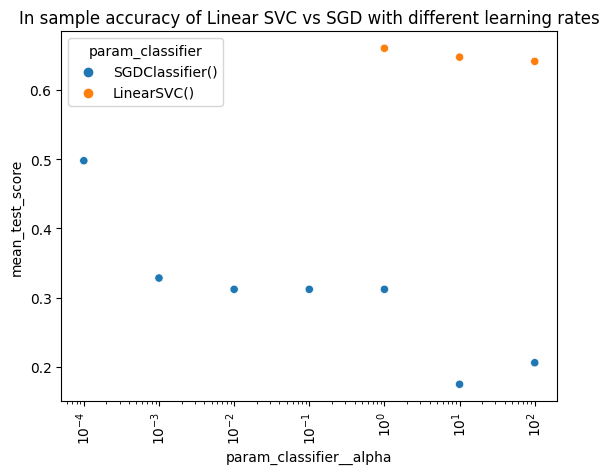

In [814]:
ax = sns.scatterplot(data=df_plot, y='mean_test_score',x ='param_classifier__alpha', hue='param_classifier')
ax.set_xticks([0.0001,0.001,0.01,0.1,1,10,100])
ax.set_xscale('log')
plt.xticks(rotation=90)
plt.title('In sample accuracy of Linear SVC vs SGD with different learning rates')

In [826]:
# Open data
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)
#df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
#df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
#df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

#df = df[['firstKeyword', 'secondKeyword', 'thirdKeyword', 'fourthKeyword', 'thematicFocusCategory', 'cleanFocusCategory']]

df = df[['firstKeyword', 'keywordStrings', 'cleanFocusCategory']]

df_clean = df.copy()
df_clean = df_clean.dropna()
df_clean['cleanKeywordStrings'] = [' '.join(map(str, l)) for l in df_clean['keywordStrings']]

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
features = tfidf.fit_transform(df_clean['firstKeyword'])
labels = df_clean['cleanFocusCategory']
features.shape

In [ ]:
category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.5522903079023207

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
labels = df_clean['cleanFocusCategory']
features.shape

KeyError: 'cleanKeywordStrings'

In [ ]:
category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(df_clean['firstKeyword'][indices_test])
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(indices_train)

Index(['35320', '166610', '170269', '32912', '65333', '159543', '136720',
       '173418', '71597', '43353',
       ...
       '147439', '70715', '67767', '69829', '140729', '54546', '54089',
       '151904', '50450', '44334'],
      dtype='object', length=53541)


In [ ]:
def show3D(searcher, grid_param_1, grid_param_2, name_param_1, name_param_2, rot=0):
    scores_mean = searcher.cv_results_['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2)).T

    print('Best params = {}'.format(searcher.best_params_))
    print('Best score = {}'.format(scores_mean.max()))

    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx, :], '-o', label=name_param_2 + ': ' + str(val))

    ax.tick_params(axis='x', rotation=rot)
    ax.set_title('Grid Search Scores')
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('CV score')
    ax.legend(loc='best')
    ax.grid('on')

In [ ]:
import numpy as np
show3D(gs, param1, param2, 'classifier__C', 'classifier__alpha', 80)

ValueError: cannot reshape array of size 10 into shape (2,4)

TypeError: float() argument must be a string or a number, not 'LinearSVC'

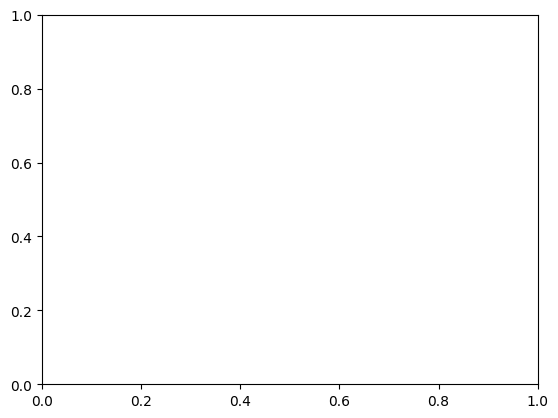

In [ ]:
sns.scatterplot(data=pd.DataFrame(gs.cv_results_), y='mean_test_score',x ='param_classifier', hue='param_classifier__C')

Text(0.5, 1.0, 'In sample accuracy of Linear SVC according to TF-IDF hyperparameters')

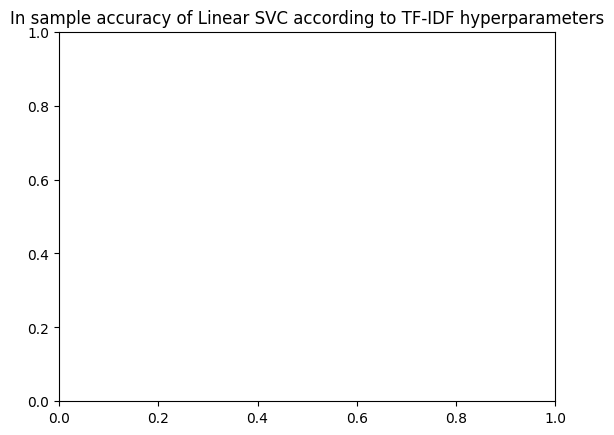

In [ ]:
sns.scatterplot(data=pd.DataFrame(gs.cv_results_), y='mean_test_score',x ='param_classifier__alpha', hue='param_classifier__C')
#ax.set_xticks([1,2,5,10,20])
plt.title('In sample accuracy of Linear SVC according to TF-IDF hyperparameters')

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words='english')
features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
labels = df_clean['cleanFocusCategory']
features.shape

(79913, 6054)

In [ ]:
category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6625966934627635


In [ ]:
df_clean['cleanKeywordStrings'].str.lower().str.split()
results = set()
df_clean['cleanKeywordStrings'].str.lower().str.split().apply(results.update)
from collections import Counter
results = Counter()
df_clean['cleanKeywordStrings'].str.lower().str.split().apply(results.update)
print(results)

{'zuzana', 'kitchen', 'hanns', 'hargeisa', 'olfactory', 'franzen', 'seselj', 'dgzrs.', 'drei', 'adriano', 'voracova', 'stars', 'sopranists', 'saf', 'bye', 'donor', 'verhofstadt', 'reich', 'lightness', 'grenadines', 'bodindradebayavarangkun', 'anterior', 'evangelizing', 'sussan', 'moctar', 'neuro-developmental', 'shinkansen', 'thoothukudi', 'tchibo', 'hiphop', 'harassment', 'ugada', 'nsw', 'enzymes', 'doorman', 'staircase', 'müntefering', 'womens', 'schacht-audorf', 'hoboken', 'panduleni', 'mazara', 'maiteeq', 'reinforced', 'limburg', 'pietro', 'nestlé', 'tunesia', 'mélenchon', 'b.1.1.7', 'freight', 'updike', 'truecrypt', 'claims', 'maurice', 'simcha', '18th', 'fulani', 'fiber', 'hvb', 'ozpolat', 'literatur', 'heiner', 'ford', 'venezuela', 'boardrooms', 'nazan', 'carousel', 'ester', 'spatula', 'conservatism', 'antartica', 'riding', 'heavenly', 'microtargeting', 'vegetables', 'ascents', 'eco-village', 'catholc', 'interactive', "'toni", 'kolegova', 'loan', '“agropolitan', 'gosling', 'term

In [ ]:
print(len(results))

41007


In [ ]:
print(df_clean['cleanKeywordStrings'][0])

Africalink Top Story Africa on the Move Making a Difference Behind the Headlines Your Say Crossroads Generation


In [ ]:
print(df_clean['cleanKeywordStrings'][1])

Commerzbank job cuts administration retail banking


In [ ]:
print(df_clean['cleanKeywordStrings'][2])

Moody's Turkey ratings agency junk status


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words='english')
features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
labels = df_clean['cleanFocusCategory']
features.shape

(79913, 38640)

In [ ]:
print(tfidf.get_feature_names())

['000', '007', '01', '03', '04', '05', '08', '0rg', '10', '100', '1000', '100m', '100th', '101', '103', '104', '106', '11', '110', '111', '112', '116', '11mm', '11th', '12', '120db', '128', '128b', '13', '130', '1325', '13th', '14', '14plus', '15', '150', '150th', '154', '155', '157', '15n', '16', '160', '168', '16th', '17', '1700', '175', '17th', '18', '1860', '1896', '1899', '18b', '18th', '19', '1904', '191', '1914', '1917', '1919', '1920s', '1922', '1924', '1925', '1927', '1932', '1933', '1936', '1937cn', '1938', '1939', '1945', '1948', '1950s', '1953', '1954', '1956', '1957', '1960s', '1961', '1962', '1966', '1967', '1968', '1969', '1970s', '1971', '1972', '1973', '1977', '1979', '1980s', '1984', '1985', '1986', '1988', '1989', '1990', '1990s', '1992', '1995', '19th', '1b', '1malaysia', '1mbd', '1mdb', '20', '200', '2000', '2001', '2005', '2006', '2008', '201', '2010', '2010s', '2011', '2012', '2013', '2014', '2015', '2016', '2016oig', '2017', '2018', '2019', '2020', '2021', '2021

/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from spellchecker import SpellChecker
eng = df_clean['cleanKeywordStrings']
eng = eng.str.lower()
eng = eng.str.split()
spell = SpellChecker()
def msp(x):
    return spell.unknown(x)
eng.apply(msp)

ModuleNotFoundError: No module named 'spellchecker'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df_clean['firstKeyword'], df_clean['cleanFocusCategory'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

KeyError: 'firstKeyword'

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
#fig, ax = plt.subplots(figsize=(20,20))
#sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

In [ ]:
accuracy_score(y_test,y_pred)

0.5147577610536218

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_clean["firstKeyword"] +" "+ df_clean["secondKeyword"] +" "+ df_clean["thirdKeyword"] +" "+ df_clean["fourthKeyword"]).toarray()
labels = df_clean['cleanFocusCategory']
category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()

In [ ]:
features.shape

(68032, 15623)

In [ ]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)



MultinomialNB()

In [ ]:
#y_pred = model.predict(X_test)
#from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
#fig, ax = plt.subplots(figsize=(20,20))
#sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

In [ ]:
#accuracy_score(y_test,y_pred)

In [ ]:
n = 35000
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 6), stop_words='english')
features = tfidf.fit_transform(df_clean["firstKeyword"][0:n] +" "+ df_clean["secondKeyword"][0:n] +" "+ df_clean["thirdKeyword"][0:n] +" "+ df_clean["fourthKeyword"][0:n]).toarray()
labels = df_clean['cleanFocusCategory'][0:n]
category_id_df = df_clean['cleanFocusCategory'][0:n].drop_duplicates().sort_values()

In [ ]:
features.shape

(35000, 11635)

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index[0:n], test_size=0.33, random_state=0)
model.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

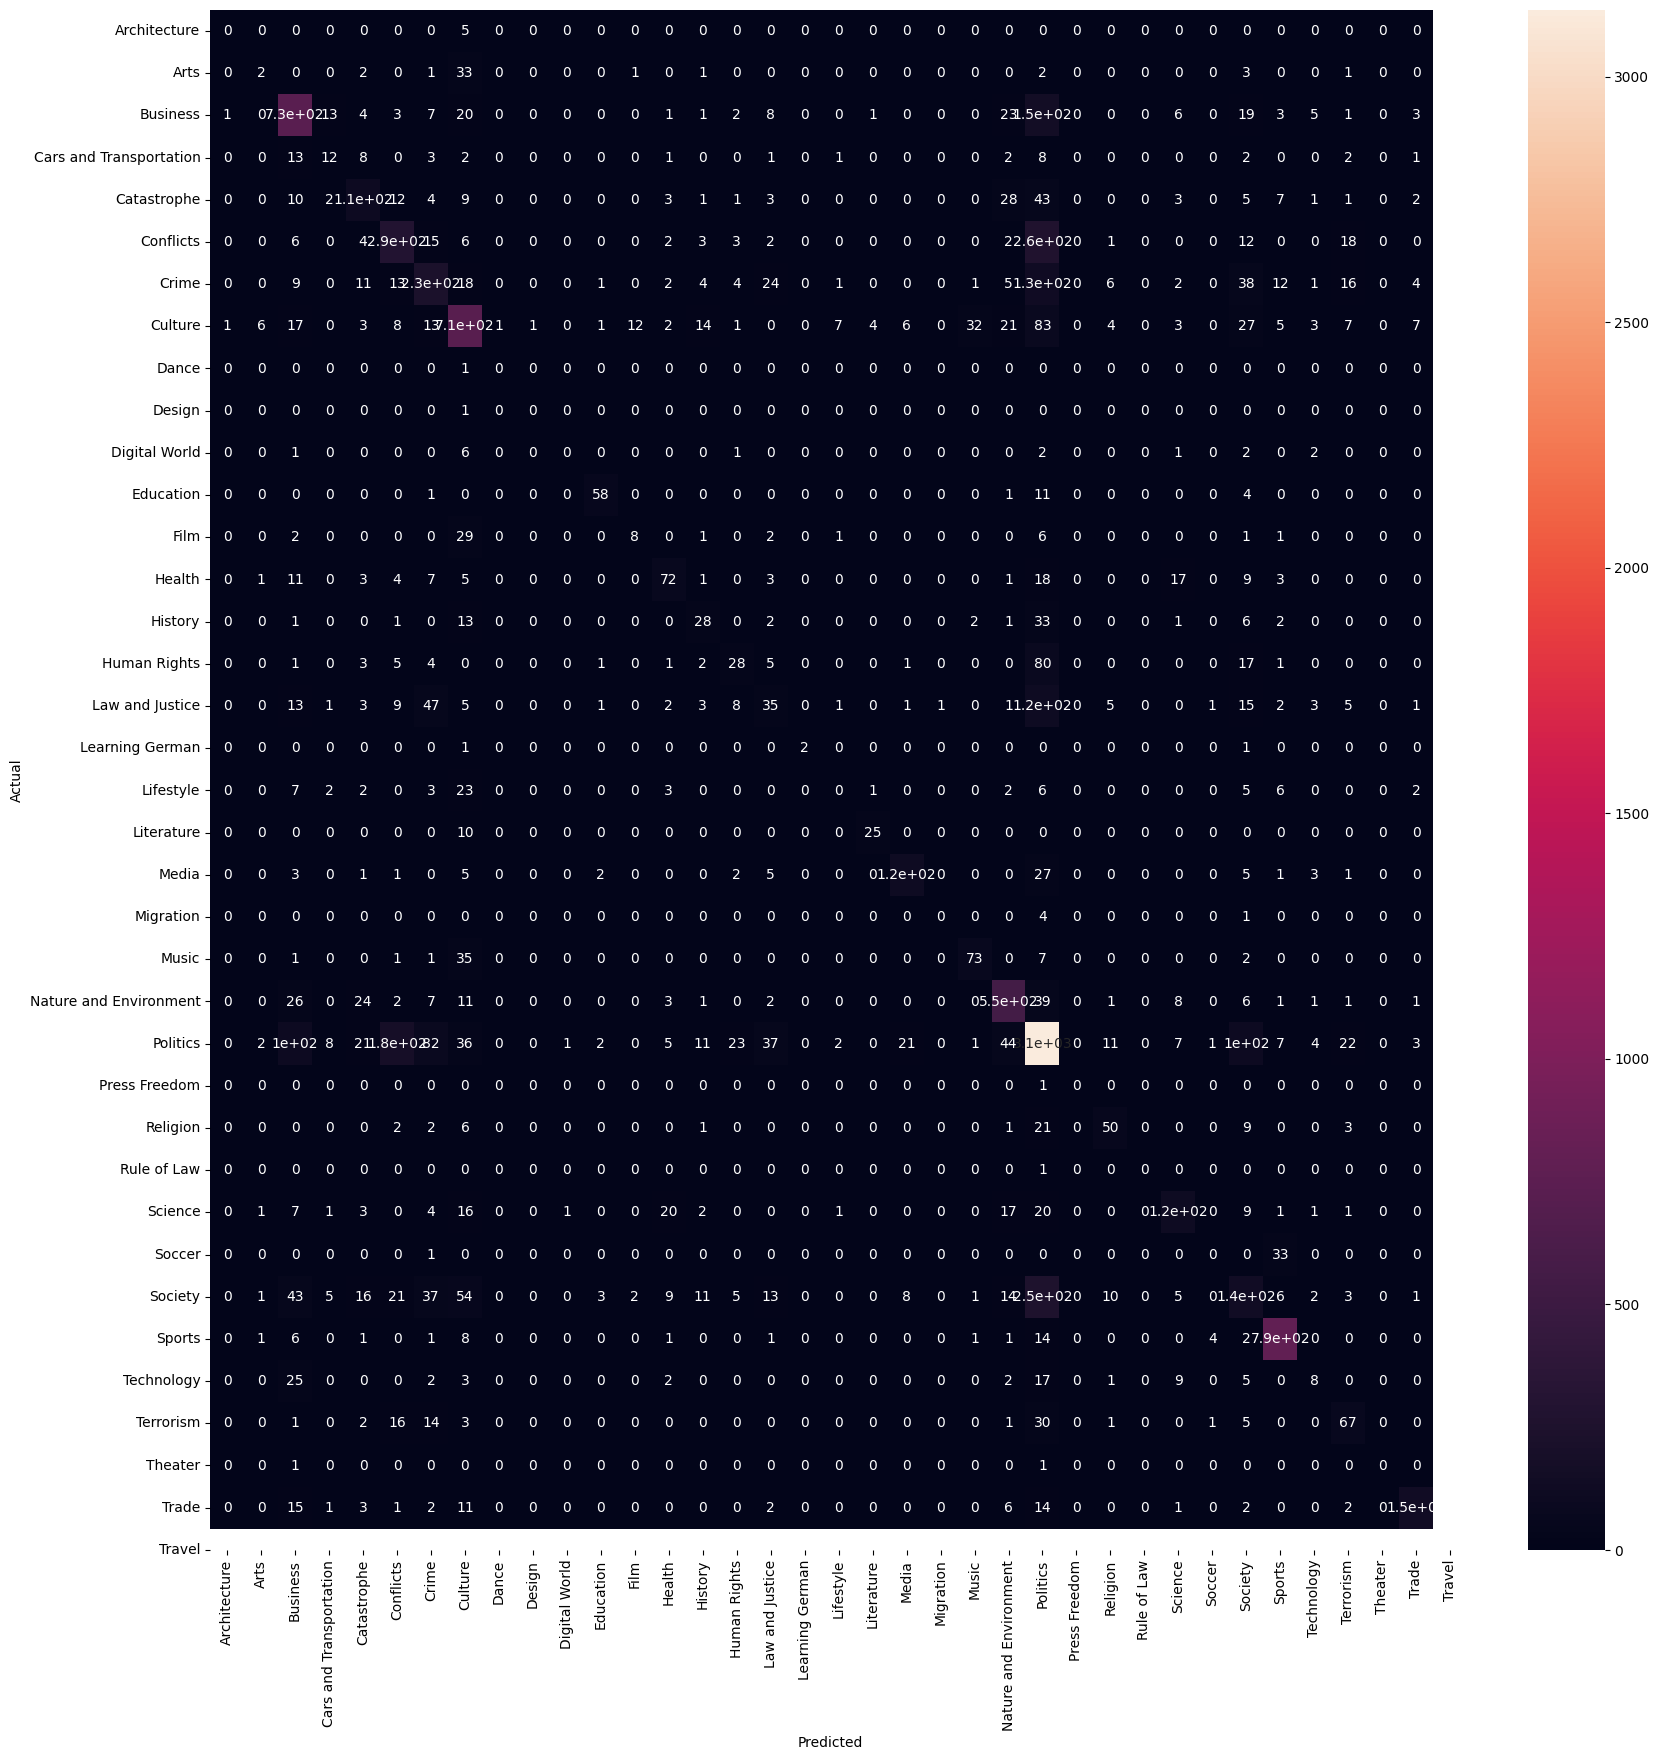

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
accuracy_score(y_test,y_pred)

0.652987012987013

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,multi_class='ovr')
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index[0:n], test_size=0.33, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

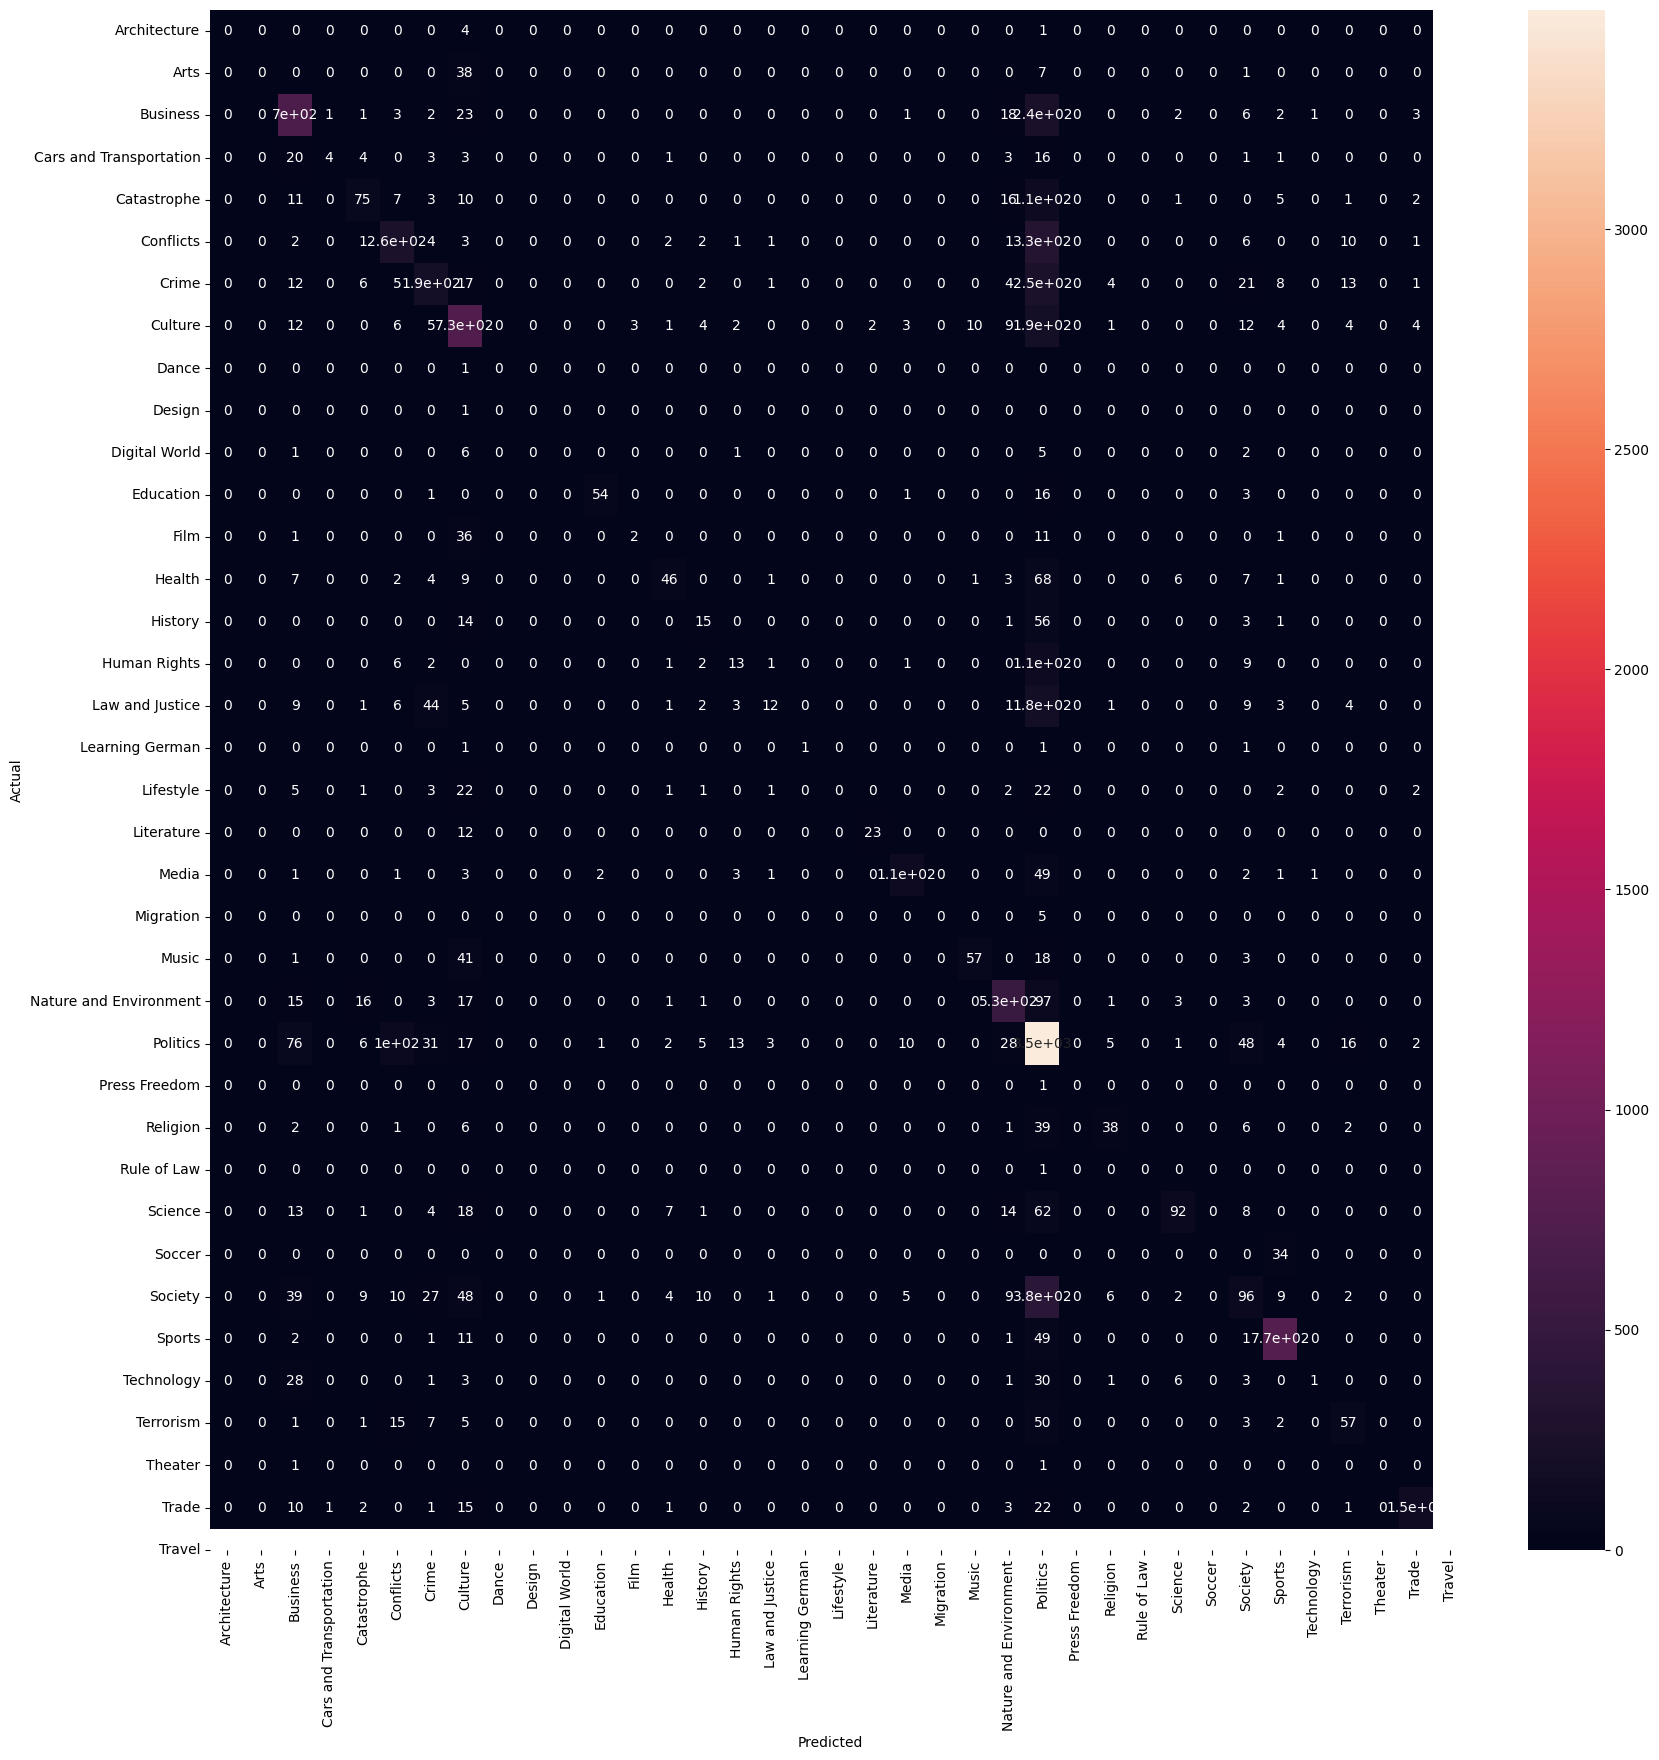

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
accuracy_score(y_test,y_pred)

0.6508225108225109

In [ ]:
# Playground Magda